In [2]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
#from dask.distributed import Client, LocalCluster, get_task_stream

#from itertools import product, combinations
#from cftime import DatetimeNoLeap
#from scipy.stats import ks_2samp, epps_singleton_2samp, ttest_ind, wilcoxon, mannwhitneyu
#from collections import ChainMap

In [3]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 22})
xr.set_options(keep_attrs=True,display_style='html')


In [4]:
timescale = 20
DJF_bool = '_DJFonly'
root_path = '/mnt/nas4.meop2/meop40.data.model/CMAM/0A.daily/'
root_path = '/mnt/data04/model/CMAM/0A.daily/'
cesta = f'{root_path}composites_woSSW{DJF_bool}/'

In [6]:
def open_date_file(file_path):
    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    df['BeginDate'] = df.BeginDate.apply(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
    return df

In [7]:
ds_all.attrs

{}

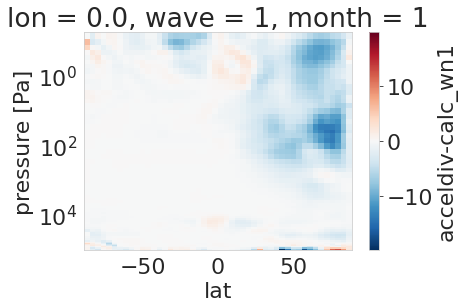

In [11]:
ds_all.sel(month = 1, wave = 1).plot(x='lat', yincrease = False)
plt.yscale('log')

In [41]:
sel_var_ls

['acceldiv-calc_wn1',
 'acceldiv-calc_wn2',
 'acceldiv-calc_wn3',
 'acceldiv-calc']

In [56]:
ds_ls[0].reset_coords(drop=True)

<xarray.DataArray 'acceldiv-calc_wn1' (wave: 1, time: 46720, plev: 63, lat: 48)>
[141281280 values with dtype=float64]
Coordinates:
  * time     (time) object 1979-01-01 00:00:00 ... 2010-12-31 18:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 8e+04 ... 0.2 0.15 0.1 0.07
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * wave     (wave) int64 1
Attributes:
    units:          m/s/day
    standard_name:  ep flux divergence
    long_name:      EP Flux Divergence

In [7]:
sel_var_ls = [f'acceldiv-calc_wn{wave}' for wave in range(1,4)]+['acceldiv-calc']
ds_ls = []
what = 'anomalies' # 'absolute'#
for sel_var in sel_var_ls:        
    infile = f'{root_path}{sel_var }/{sel_var}_6hrPlev_CMAM_CMAM30-SD_r1i1p1_19790101-20101231_{what}.nc'
    ds = xr.open_dataset(infile)[sel_var]
    if sel_var == 'acceldiv-calc':
        ds = ds.expand_dims('wave')
        ds['wave']=['all']
    ds_ls.append(ds.reset_coords(drop=True))

ds_all = xr.concat(ds_ls, dim ='wave')
#ds[sel_var] = ds[sel_var]#*24*3600.
ds_all = ds_all.resample(time = '1D').mean('time')
ds_all['time'] = ds_all.indexes['time'].to_datetimeindex()
ds_all['plev'] = ds_all['plev']/100.
ds_all['plev'].attrs['units'] = 'hPa'
ds_all

/tmp/ipykernel_1603049/3813005699.py:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds_all['time'] = ds_all.indexes['time'].to_datetimeindex()


<xarray.DataArray 'acceldiv-calc_wn1' (wave: 4, time: 11680, plev: 63, lat: 48)>
array([[[[-1.02230600e+00, -4.91521863e-01, -3.54001456e+00, ...,
           4.91041213e+01,  2.50465000e+01,  7.01939510e+00],
         [-9.88195356e-01, -5.22773049e+00, -1.58145348e-01, ...,
           3.46774575e+01,  3.36554111e+01,  2.20181651e+01],
         [-8.09004324e-01, -5.12891106e+00,  2.26187755e+00, ...,
           1.14351400e+01,  3.38448982e+01,  2.25643745e+01],
         ...,
         [-2.87038031e+00,  7.96960179e+00, -5.46443247e-02, ...,
           6.98225832e+00, -5.22234184e+00,  2.60534216e+00],
         [-4.84786595e+01, -2.11373823e+01,  9.31131334e+00, ...,
           6.98756252e+00,  1.12218303e+01,  1.32161554e+01],
         [-5.70736151e+00, -1.56569688e+01,  8.06920681e+00, ...,
           5.69559448e+00,  1.13468003e+01,  1.72049824e+01]],

        [[-8.95678205e-01,  2.12489427e+00,  3.85097433e-01, ...,
           5.10610289e+01,  3.96147455e+01,  3.28840438e+01],
         [-7.92070608e-01, -6.94211035e-01,  1.12808405e+00, ...,
           3.02599665e+01,  1.12977172e+01, -7.54848336e+00],
         [-7.79387367e-01, -3.94994501e+00,  4.72976081e-02, ...,
           2.85610291e+00, -3.57192411e+00, -1.43860222e+01],
...
         [-4.53269460e-02,  2.55691460e+00, -1.38796028e+01, ...,
           1.09301736e+01,  2.91733032e+01, -5.67335334e+00],
         [ 3.13403175e+01, -2.02553774e+01, -8.29786207e+00, ...,
           4.20604330e-02,  9.21999660e+00, -1.45284427e+01],
         [ 4.12819882e+01, -1.96391454e+01,  4.83257140e+01, ...,
           2.31993479e+01, -5.80801254e+01, -9.63518294e+00]],

        [[ 6.89586043e-01, -8.48360567e+00,  4.75094414e+00, ...,
          -9.98167135e+00, -4.32605229e+01,  3.75574916e+00],
         [ 6.78528490e-01, -2.77002194e+00,  2.94772266e+00, ...,
          -3.74855693e+00, -1.34273282e+01,  6.35870209e+00],
         [ 8.66345350e-01,  1.47669315e+00,  1.22941535e+00, ...,
           2.93527858e+00, -2.76798988e+00,  2.43435545e+00],
         ...,
         [ 2.01996205e+01, -4.80566073e-01, -1.32108654e+01, ...,
          -6.49851376e+00,  4.40126616e+01,  2.13523597e+01],
         [ 4.07712185e+01, -5.09266175e+00, -1.81035615e+01, ...,
          -3.38392031e-01,  2.21463391e+01, -2.40815489e+01],
         [ 6.25027897e+01, -1.85124517e+01,  2.34232529e+01, ...,
           1.07659266e+01, -6.60509190e+01,  3.42744616e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2010-12-31
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 ... 0.0015 0.001 0.0007
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * wave     (wave) object 1 2 3 'all'
Attributes:
    units:          m/s/day
    standard_name:  ep flux divergence
    long_name:      EP Flux Divergence

In [8]:
name_ls = ['himalayas','eastasia','westamer']
ds_ls2 = []
max_lag = 10
g_method = 'dayofyear' # 'month'
sel_plev_ls = [10,30,300,500]

for name in name_ls:
    df_dates = open_date_file(f"accelogw_{name}_hotspot@70hPa_20dayts_indexes.csv")
    
    ds_ls = []
    for il, lag in enumerate(range(-max_lag,max_lag+1)):
        #print(lag)
        dates = df_dates.set_index('BeginDate')

        dates = dates.index + pd.Timedelta(str(lag)+' days')
        #filter lags withi 29th February
        #dates = dates[dates.apply(lambda x: not (x.day in [29] and x.month in [2]))]
        dates = dates[~((dates.month == 2) & (dates.day == 29))]
        #filter dates shited to year out of range
        #dates = dates[dates.apply(lambda x: not (x.year in [1978,2011]))]
        dates =  dates[(dates.year != 2011) & (dates.year != 1978)]
        dates = dates[(dates.month == 12) | (dates.month == 1) | (dates.month == 2)]
        
        # plev = [300,200,30,10]
        ds_sel_dates = ds_all.sel(time = dates).mean('time') 
        #temp = tm_mean_xr(ds_sel_dates, ['lat','plev'])#(trim_mean(ds_sel_dates['refr_index'].stack(points = ('lat','plev')).values, 0.1, axis=2)
        ds_ls.append(ds_sel_dates)#xr.DataArray(temp, dims = ['wavenumber']))
        
    temp = xr.concat(ds_ls, dim = 'lag')
    temp['lag'] = range(-max_lag, max_lag+1)
    ds_ls2.append(temp)
    
ds_all_comp = xr.concat(ds_ls2, dim = 'what')
ds_all_comp['what'] = name_ls
ds_all_comp

<xarray.DataArray 'acceldiv-calc_wn1' (what: 3, lag: 21, wave: 4, plev: 63, lat: 48)>
array([[[[[ 3.86279533e-01,  7.26626827e-01, -6.63275502e-02, ...,
           -1.76976299e+00, -9.69060263e-02, -2.08182790e+00],
          [ 4.10605239e-01, -2.67112610e-01, -3.07667381e-01, ...,
           -5.97440980e-01, -1.20269387e-01, -4.92862226e-01],
          [ 4.23081744e-01, -1.15331414e+00, -1.44344969e-01, ...,
            2.49404138e-01,  2.19027876e-01,  4.87254350e-01],
          ...,
          [ 9.16775425e-01,  1.98639195e+00,  1.11267415e+00, ...,
            2.30773915e+00,  2.45176231e+00, -1.54135184e-01],
          [-3.37727184e+00,  3.51806852e-01, -6.08316604e-01, ...,
            9.61797338e-01,  3.90415218e+00,  7.50626056e+00],
          [-6.90325528e+00,  1.95014947e+00, -3.07158573e+00, ...,
           -1.26502671e+00,  3.99553712e+00,  9.04082421e+00]],

         [[-9.30943797e-02,  1.95074201e+00,  7.20031770e-01, ...,
           -1.88248387e+00, -1.54266307e+00, -1.38287232e+00],
          [-9.78139195e-02,  1.26967648e+00,  3.02637189e-01, ...,
           -6.11935942e-01, -9.37889164e-01, -3.40134836e-01],
          [-6.87175415e-02,  9.29147838e-01,  1.00241942e-02, ...,
            7.66261505e-01,  7.11193262e-01,  2.40758580e-01],
...
          [ 4.71162693e-01, -4.54500111e-01,  4.85687499e-02, ...,
           -9.95383226e-01,  1.65296214e-01,  4.11693310e-01],
          [ 1.47621452e-01, -4.76561439e-02, -2.08355778e-01, ...,
           -4.91991683e-01, -8.99945482e-01, -2.08827164e+00],
          [ 7.18164811e-01,  6.51567589e-01, -1.44465407e+00, ...,
            8.08965398e-01, -1.58422462e+00, -2.32789182e+00]],

         [[ 6.13138686e-02, -5.34954091e-01,  6.21007189e-01, ...,
           -5.78745480e+00, -1.94654256e+00,  1.32383307e+00],
          [ 7.13205901e-02, -3.73835910e-01,  5.38066665e-01, ...,
           -3.12495654e+00, -2.96464606e-01,  2.85237773e+00],
          [ 8.89473277e-02, -5.00263281e-03,  2.88896818e-01, ...,
           -3.66826852e-01,  5.01593734e-01,  3.01481754e+00],
          ...,
          [ 1.94460199e+00, -7.02729897e+00,  2.39544748e+00, ...,
           -2.37289187e+00,  1.09928673e+00, -3.09452244e+00],
          [ 2.97284042e+00, -8.07833080e+00, -1.39767982e+00, ...,
            2.55289941e-01,  3.67514731e+00, -1.49218042e+00],
          [-3.49038004e+00,  1.14362656e+01,  5.66040598e+00, ...,
            3.00948684e+00,  2.14127073e+00,  3.74288163e-01]]]]])
Coordinates:
  * plev     (plev) float64 1e+03 925.0 850.0 800.0 ... 0.0015 0.001 0.0007
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * wave     (wave) object 1 2 3 'all'
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * what     (what) <U9 'himalayas' 'eastasia' 'westamer'
Attributes:
    units:          m/s/day
    standard_name:  ep flux divergence
    long_name:      EP Flux Divergence

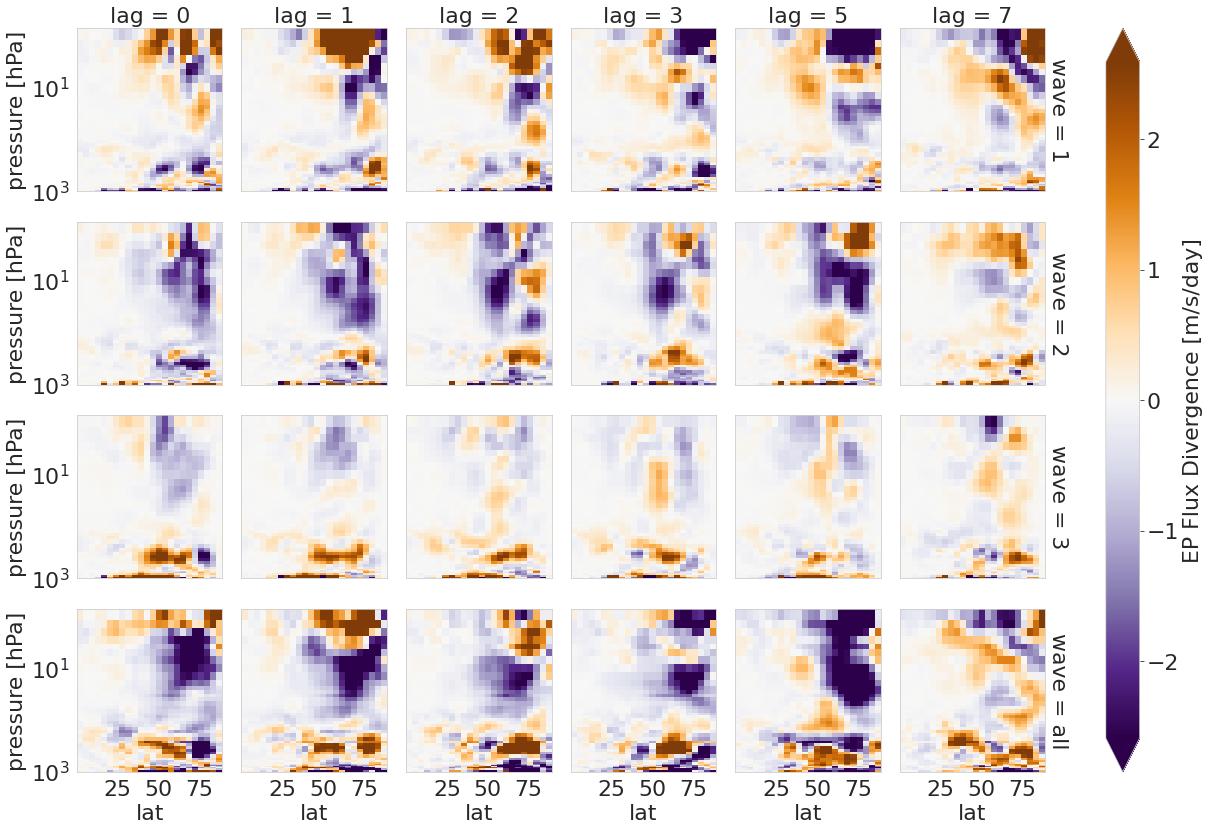

In [13]:
cmap = mpl.cm.PuOr_r

ds_all_comp.sel(
    lag=[0,1,2,3,5,7], 
    lat = slice(0,90),
    plev=slice(None,1),
    what = 'himalayas'
).plot(
    x = 'lat', 
    col = 'lag',
    row = 'wave',
    yincrease = False,
    cmap = cmap,
    robust = True
)
plt.yscale('log')

## Lines

In [58]:
name_ls = ['himalayas','eastasia','westamer']
ds_ls2 = []
max_lag = 10
g_method = 'dayofyear' # 'month'
sel_plev_ls = [10,30,300,500]

for name in name_ls:
    df_dates = open_date_file(f"accelogw_{name}_hotspot@70hPa_20dayts_indexes.csv")
    
    ds_ls = []
    for il, lag in enumerate(range(-max_lag,max_lag+1)):
        #print(lag)
        dates = df_dates.set_index('BeginDate')

        dates = dates.index + pd.Timedelta(str(lag)+' days')
        #filter lags withi 29th February
        #dates = dates[dates.apply(lambda x: not (x.day in [29] and x.month in [2]))]
        dates = dates[~((dates.month == 2) & (dates.day == 29))]
        #filter dates shited to year out of range
        #dates = dates[dates.apply(lambda x: not (x.year in [1978,2011]))]
        dates =  dates[(dates.year != 2011) & (dates.year != 1978)]
        dates = dates[(dates.month == 12) | (dates.month == 1) | (dates.month == 2)]
        
        # plev = [300,200,30,10]
        ds_sel_dates = ds_all.sel(time = dates, \
                              plev = sel_plev_ls, \
                              lat = slice(60,80)).mean(['lat']) 
        #temp = tm_mean_xr(ds_sel_dates, ['lat','plev'])#(trim_mean(ds_sel_dates['refr_index'].stack(points = ('lat','plev')).values, 0.1, axis=2)
        ds_ls.append(ds_sel_dates)#xr.DataArray(temp, dims = ['wavenumber']))
        
    temp = xr.concat(ds_ls, dim = 'lag')
    temp['lag'] = range(-max_lag, max_lag+1)
    ds_ls2.append(temp)
    
ds_all_comp = xr.concat(ds_ls2, dim = 'what')
ds_all_comp['what'] = name_ls
ds_all_comp

<xarray.DataArray 'acceldiv-calc_wn1' (what: 3, lag: 21, wave: 4, time: 1565, plev: 4)>
array([[[[[ 2.15433547e+00,  4.83495809e-01,  6.18310742e+00,
           -3.11615415e-01],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          ...,
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan]],

         [[ 6.81387017e+00,  1.04468980e+00, -6.53117530e+00,
            2.66213139e+00],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
...
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [ 2.31929135e-01, -6.02892436e-02,  1.95402396e+00,
           -2.12273395e+00]],

         [[            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          ...,
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [ 1.55225390e+00, -1.65220155e+00, -3.89799783e+00,
           -7.46026443e-03]]]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-06 1979-01-07 ... 2010-12-30
  * plev     (plev) float64 10.0 30.0 300.0 500.0
  * wave     (wave) object 1 2 3 'all'
  * lag      (lag) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * what     (what) <U9 'himalayas' 'eastasia' 'westamer'
Attributes:
    units:          m/s/day
    standard_name:  ep flux divergence
    long_name:      EP Flux Divergence

In [59]:
df_all = ds_all_comp.to_dataframe(name = sel_var).reset_index().drop(columns=['time'])#)
df_all.head()

,what,lag,wave,plev,acceldiv-calc
0,himalayas,-10,1,10.0,2.154335
1,himalayas,-10,1,30.0,0.483496
2,himalayas,-10,1,300.0,6.183107
3,himalayas,-10,1,500.0,-0.311615
4,himalayas,-10,1,10.0,NaN


Text(0.5, 878.6900000000002, 'lag [day]')

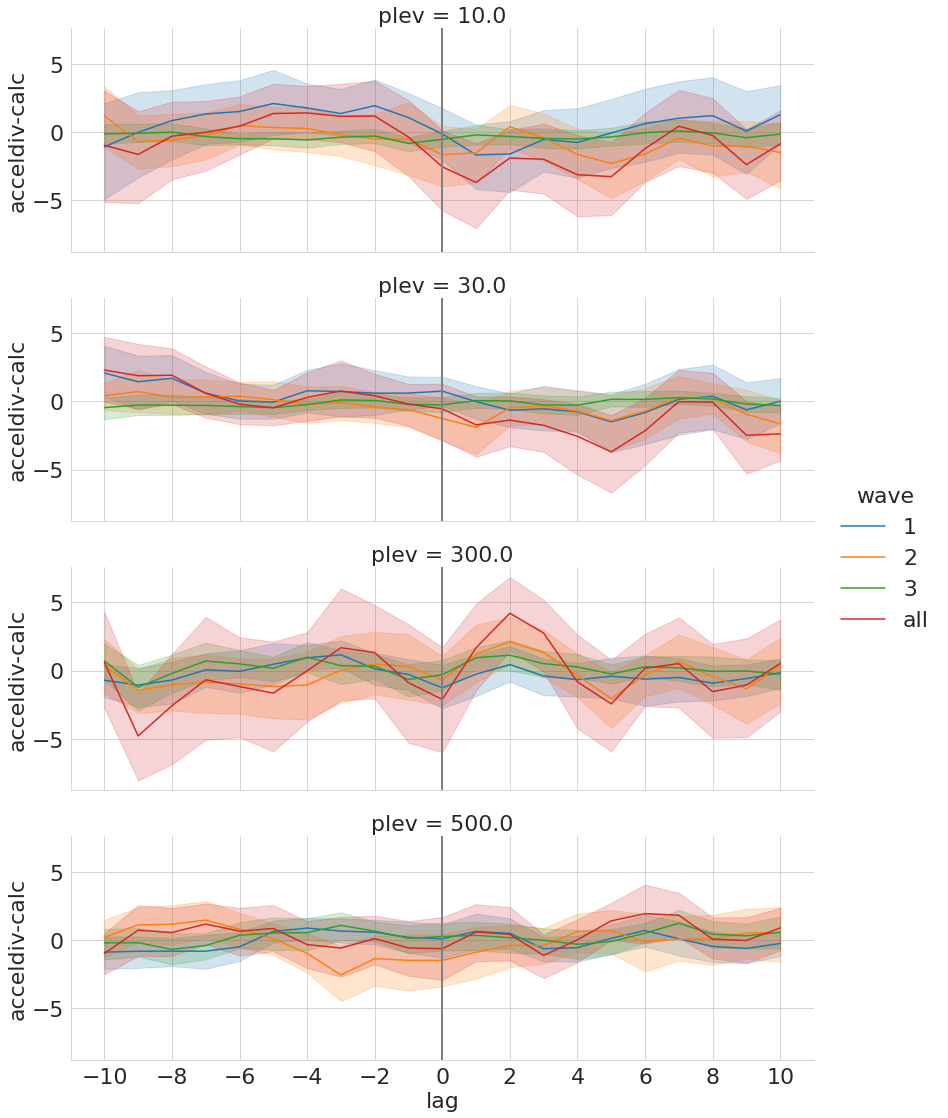

In [60]:
sel_what = 'himalayas'
                      
mask = (df_all['what'] == sel_what)# & (df_all['wavenumber'] == 1) 
data = df_all[mask]#.drop(columns = '')

g = sns.FacetGrid(
    data,  
    hue = 'wave', 
    sharey=True,  
    height = 4, 
    aspect = 3, 
    row = 'plev',
)#, margin_titles = True) row = 'wavenumber',
g.map(sns.lineplot, "lag", sel_var, n_boot=1000) # 10000
g.add_legend()
g.map(plt.axvline, x=0, c='gray', lw = 2)
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#g.set(yscale='log')
#g.map(plt.axhline, y=0, c='k')
g.axes[0][0].xaxis.set_major_locator(MultipleLocator(2))
#g.axes[0][0].set_ylabel('refr. index')
g.axes[0][0].set_xlabel('lag [day]')
#plt.savefig(f'refr_lagA_composite_CI.pdf', bbox_inches='tight')

Text(0.5, 878.6900000000002, 'lag [day]')

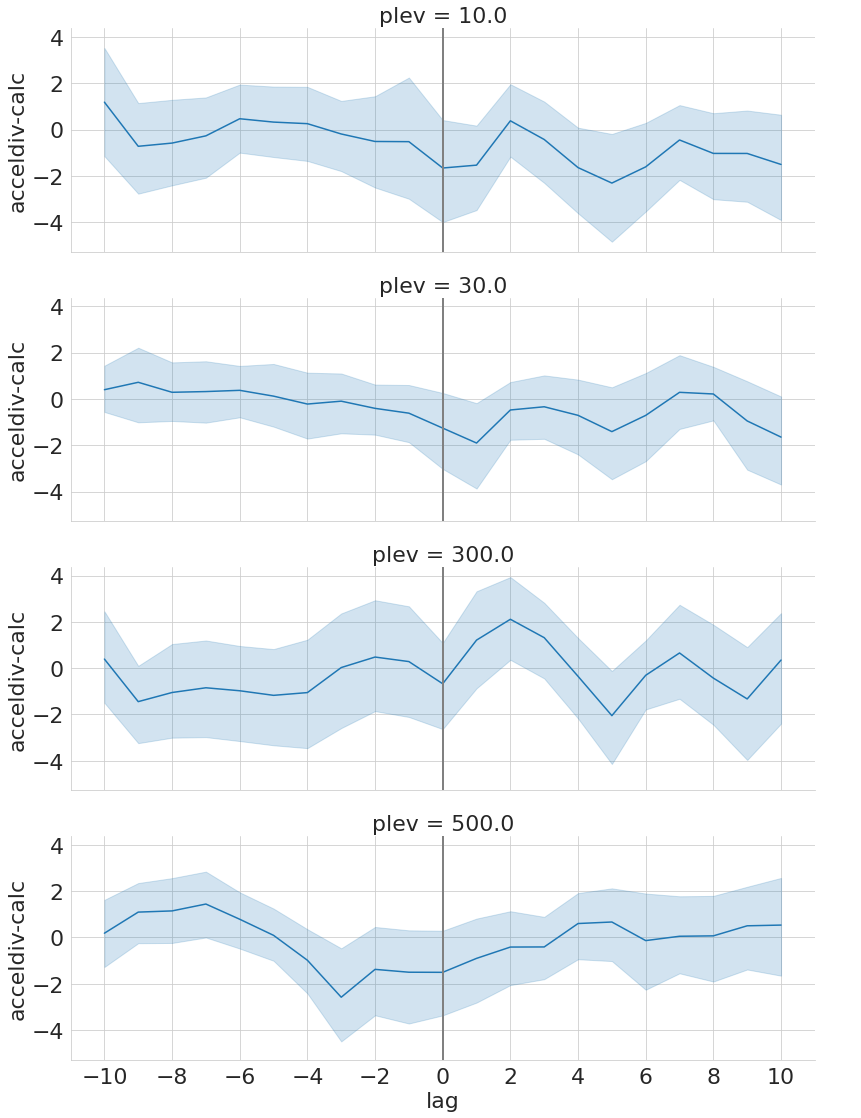

In [61]:
sel_what = 'himalayas'
                      
mask = (df_all['what'] == sel_what) & (df_all['wave'] == 2) 
data = df_all[mask]#.drop(columns = '')

g = sns.FacetGrid(
    data,  
    sharey=True,  
    height = 4, 
    aspect = 3, 
    row = 'plev',
)#, margin_titles = True) row = 'wavenumber',
g.map(sns.lineplot, "lag", sel_var, n_boot=1000) # 10000
g.add_legend()
g.map(plt.axvline, x=0, c='gray', lw = 2)
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#g.set(yscale='log')
#g.map(plt.axhline, y=0, c='k')
g.axes[0][0].xaxis.set_major_locator(MultipleLocator(2))
#g.axes[0][0].set_ylabel('refr. index')
g.axes[0][0].set_xlabel('lag [day]')
#plt.savefig(f'refr_lagA_composite_CI.pdf', bbox_inches='tight')